In [1]:
import skimage
import numpy as np
from skimage import io, filters, feature, exposure
import matplotlib.pyplot as plt
import scipy as sp
import glob

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 15

In [3]:
fns = np.asarray(glob.glob('./*.bmp'))

In [4]:
# 0, 6 - 10
fns = fns[[0, 6, 7, 8, 9, 10]] # works only 1, 2 [0, 1] images

In [5]:
def coundCutlery(img_name, show):
    def plot(img):
        plt.imshow(img, cmap='gray', interpolation='nearest')
        plt.show()
    
    
    def elong(img):
        return skimage.measure.perimeter(tmp) ** 2 / tmp.sum()
    
    img_0 = skimage.io.imread(img_name)
    img = img_0[..., 0]
    img_eroded = skimage.morphology.erosion(img, skimage.morphology.disk(1))
    img_eq = skimage.exposure.equalize_adapthist(img_eroded)
    img_sobel = skimage.filters.sobel(img_eroded)
    img_bin = skimage.filters.threshold_adaptive(img_sobel, 900)
    img_without_small = skimage.morphology.remove_small_objects(img_bin, 900)
    img_filled = sp.ndimage.morphology.binary_fill_holes(img_without_small)
    img_cleared = skimage.morphology.remove_small_objects(skimage.morphology.erosion(img_filled), 128)
    
    img_lbls = skimage.measure.label(img_cleared)
    max_elem = img_lbls.max()
    img_res = np.copy(img_lbls)

    # knife = 0, fork = 1, spoon = 2
    n_knife = 0
    n_spoon = 0
    n_fork = 0
    for i in range(max_elem):
        tmp = img_lbls == i + 1
        if (skimage.measure.perimeter(tmp) ** 2 / (tmp).sum() > 85):
            n_fork += 1
            img_res[tmp] = 10
        else:
            tmp = skimage.morphology.erosion(tmp, skimage.morphology.disk(15))
            if tmp.sum() != 0 and 15 < elong(tmp) < 20:
                n_spoon += 1
                img_res[img_lbls == i + 1] = 20
            else:
                n_knife += 1
                img_res[img_lbls == i + 1] = 30
    
    plt.imshow(img_0)
    plt.show()

    if len(show) and show['all']:
        plot(img_eroded)
        plot(img_eq)
        plot(img_sobel)
        plot(img_bin)
        plot(img_without_small)
        plot(img_filled)
        plot(img_cleared)
        plot(img_lbls)
        
    if len(show) and show['bin']:
        plot(img_cleared)
        
    plt.imshow(img_res)
    plt.show()

In [11]:
show = {}
show['all'] = True
show['bin'] = False

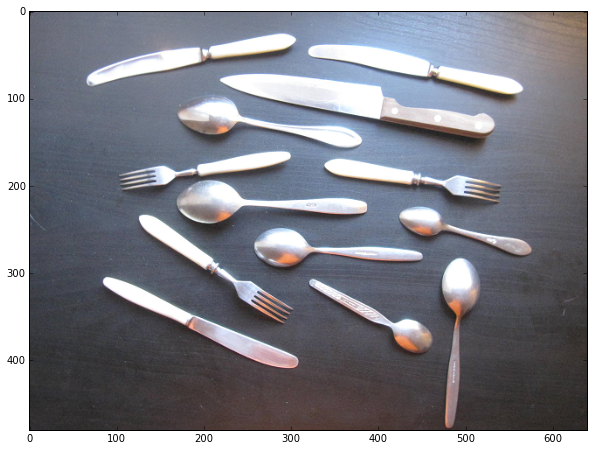

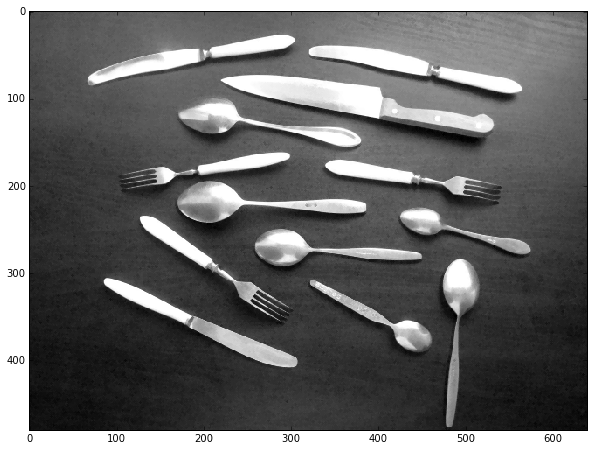

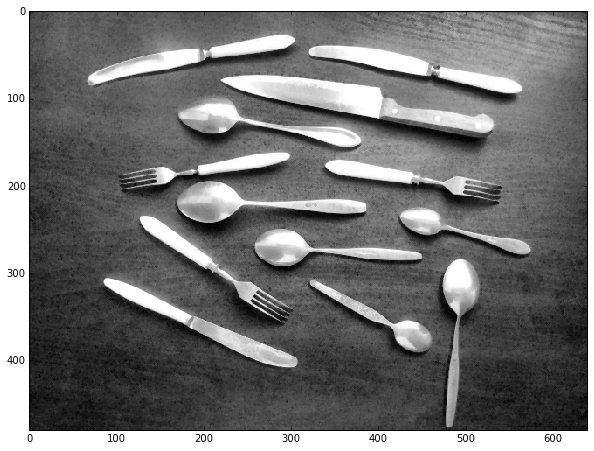

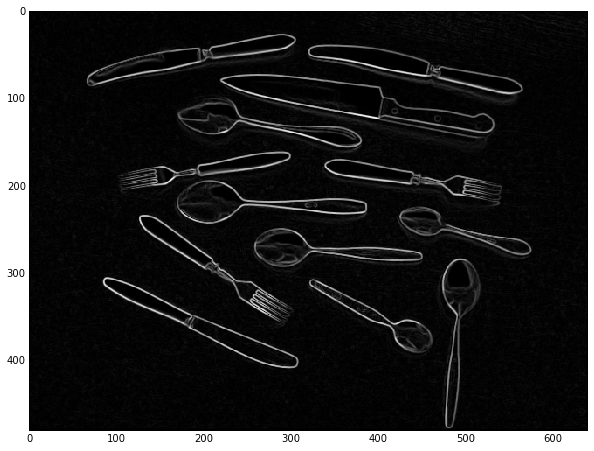

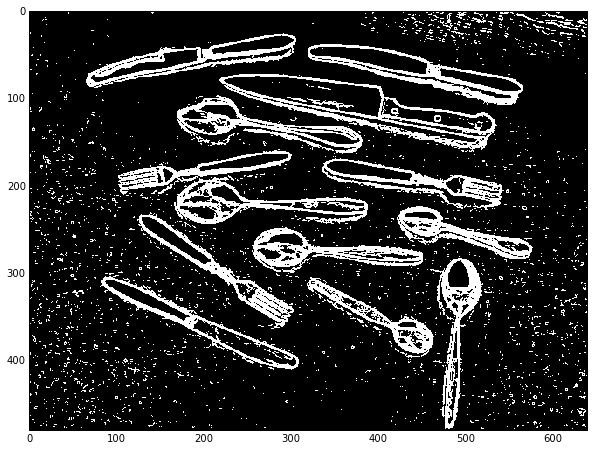

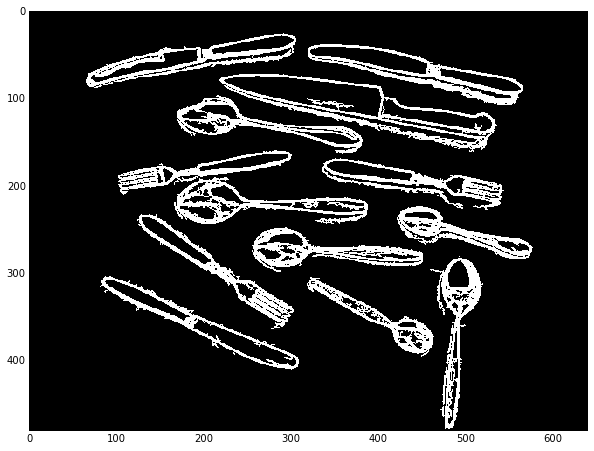

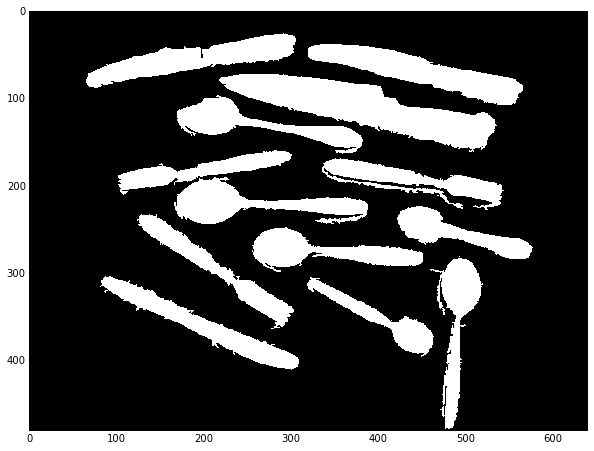

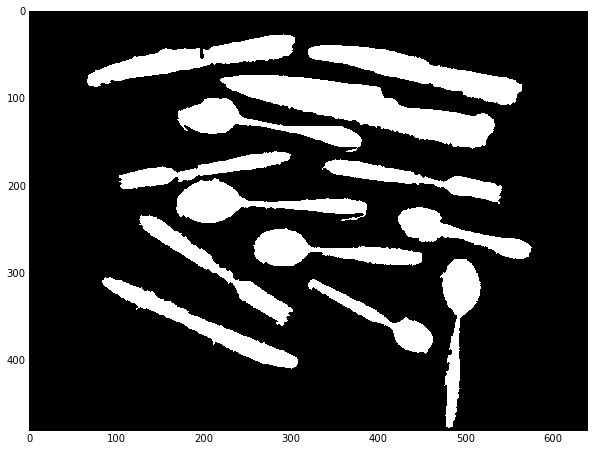

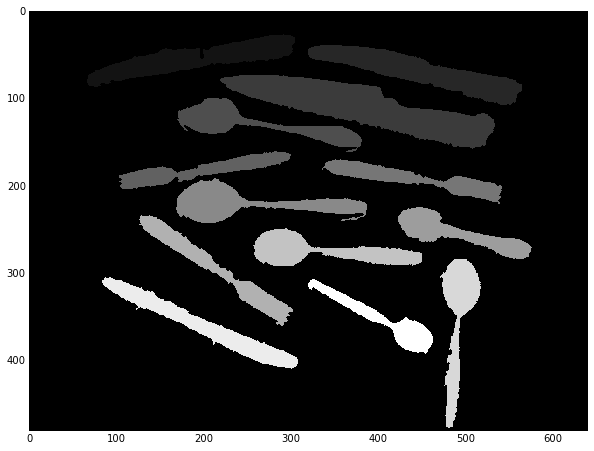

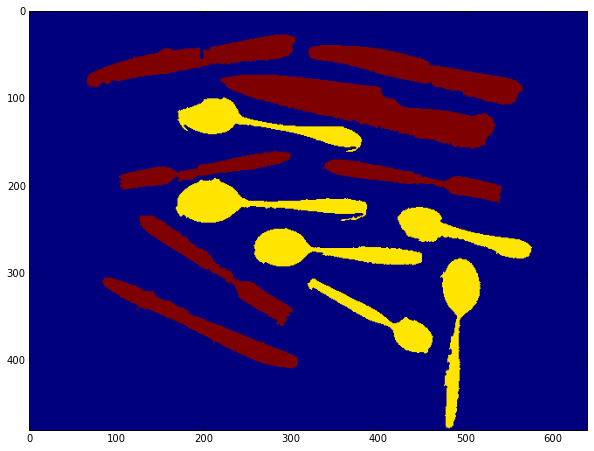

In [12]:
coundCutlery(fns[4], show)

In [760]:
# img_eroded = skimage.morphology.erosion(img, skimage.morphology.disk(1))
# # plot(img_eroded)
# img_eq = skimage.exposure.equalize_adapthist(img_eroded)
# # plot(img_eq)
# img_sobel = skimage.filters.sobel(img_eroded)
# # plot(img_sobel)
# img_bin = skimage.filters.threshold_adaptive(img_sobel, 900)
# # plot(img_bin)
# img_withoud_small = skimage.morphology.remove_small_objects(img_bin, 900)
# # plot(img_withoud_small)
# img_filled = sp.ndimage.morphology.binary_fill_holes(img_withoud_small)
# # plot(img_filled)
# img_cleared = skimage.morphology.remove_small_objects(skimage.morphology.erosion(img_filled), 128)
# # plot(img_cleared)
# img_lbls = skimage.measure.label(img_cleared)
# max_elem = img_lbls.max()
# # max_elem
# # names = ['K', 'K', 'F', 'S', 'S', 'K', 'F', 'S', 'F', 'S', 'F', 'S'] # 0
# # names = ['S', 'K', 'K', 'F', 'S', 'F', 'S', 'S'] # 1
# # names = ['K', 'K', 'K', 'S', 'F', 'F', 'S', 'S', 'F', 'S', 'S', 'K', 'S'] # 4

# # res = []
# # for C in range(1, max_elem + 1):
# #     tmp = img_lbls == C
# #     res.append(elong(tmp))
# #     print(names[C - 1], elong(tmp))
# # #     plot(tmp)
# # #     plt.show()
# # comp = np.asarray(zip(np.asarray(names)[np.argsort(names)], np.asarray(res)[np.argsort(names)]))
# # k = round(comp[comp[:, 0] == 'F'][:, 1].astype(np.float).min())
# # for i in range(max_elem):
# #     tmp = img_lbls == i + 1
# #     if (elong(tmp) < k):
# #         tmp = skimage.morphology.erosion(tmp, skimage.morphology.disk(15))
# #         if tmp.sum() != 0:
# #             print(names[i], elong(tmp))
# #         else:
# #             print(names[i], 0)
# # #         plot(tmp)
# # #         plt.show()
    
# n_knife = 0
# n_spoon = 0
# n_fork = 0
# for i in range(max_elem):
#     tmp = img_lbls == i + 1
#     if (skimage.measure.perimeter(tmp) ** 2 / (tmp).sum() > 85):
#         n_fork += 1
#     else:
#         tmp = skimage.morphology.erosion(tmp, skimage.morphology.disk(15))
#         if tmp.sum() != 0 and 15 < elong(tmp) < 20:
#             n_spoon += 1
#         else:
#             n_knife += 1

In [669]:
# n_knife, n_spoon, n_fork

(2, 4, 2)